In [121]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [122]:
file_path = "result/TSMC.json"
tsmc = pd.read_json(file_path)

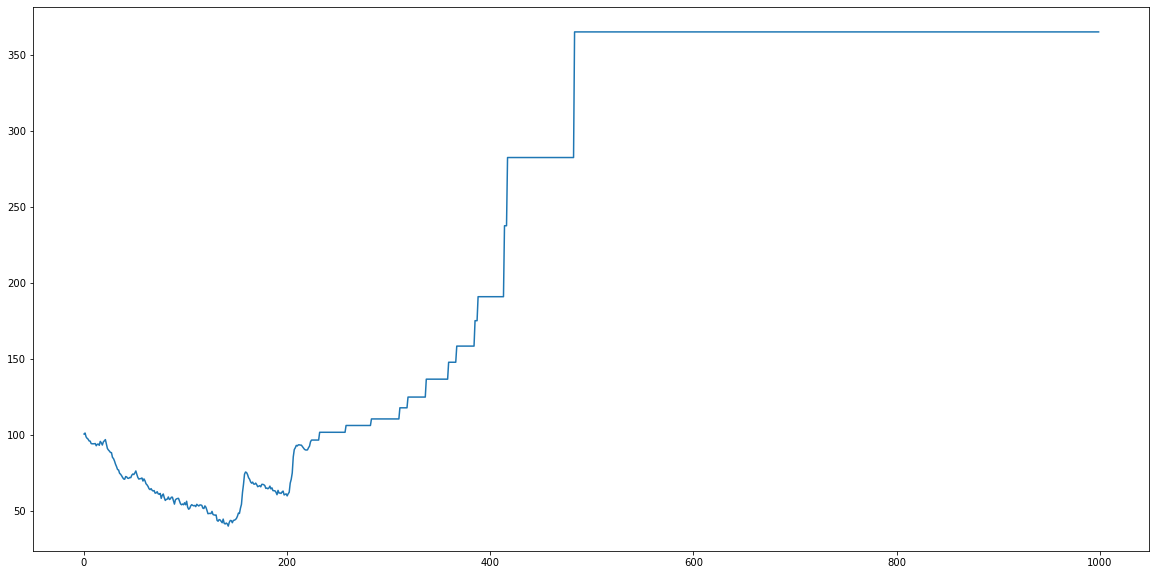

In [123]:
tsmc['average'].plot(figsize = (20, 10))

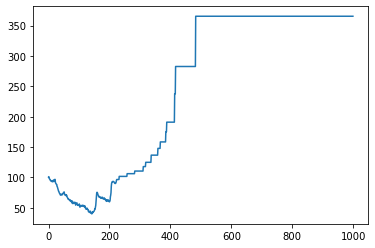

In [124]:
tsmc['average'].plot()

In [125]:
file_path = "result/agent.json"
agent = pd.read_json(file_path)

In [126]:
agent.columns

Index(['zi_1_CASH', 'zi_1_TSMC', 'zi_1_WEALTH', 'ch_1_CASH', 'ch_1_TSMC',
       'ch_1_WEALTH'],
      dtype='object')

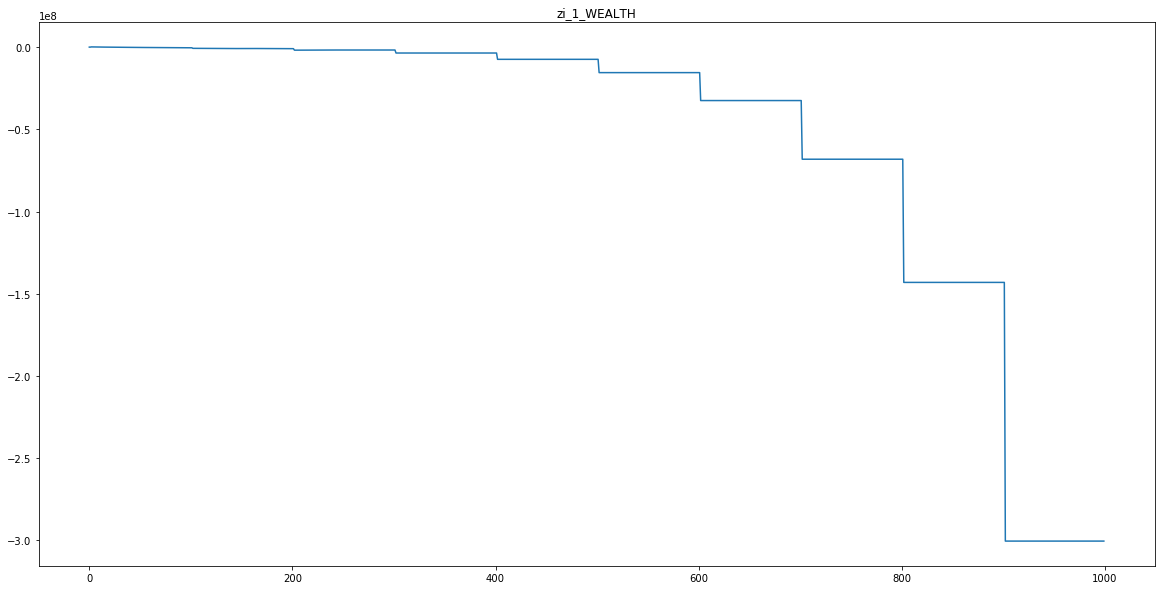

In [127]:
# for agent_type in agent.columns:
agent.iloc[:, 2].plot(title = agent.columns[2],  figsize = (20, 10))

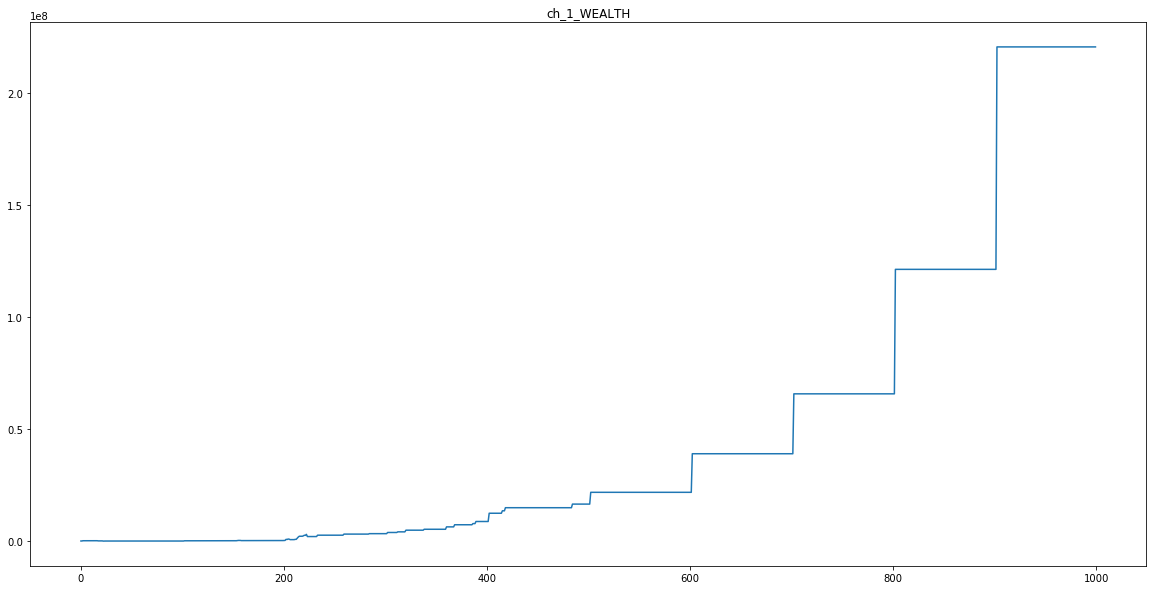

In [128]:
agent.iloc[:, 5].plot(title = agent.columns[5],  figsize = (20, 10))

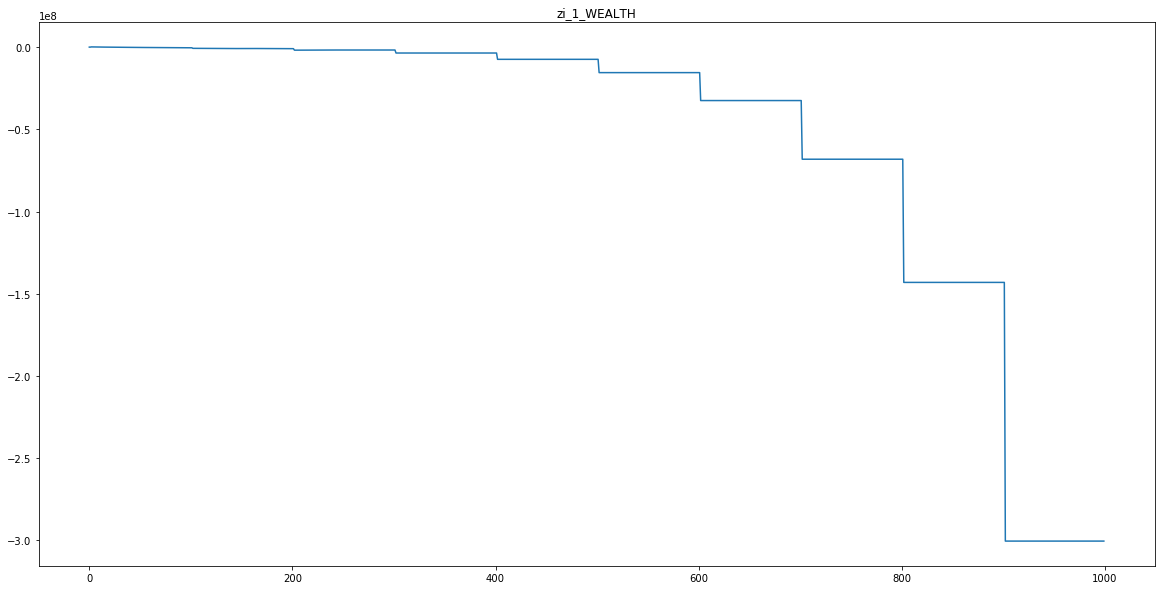

In [129]:
agent.iloc[:, 2].plot(title = agent.columns[2],  figsize = (20, 10))

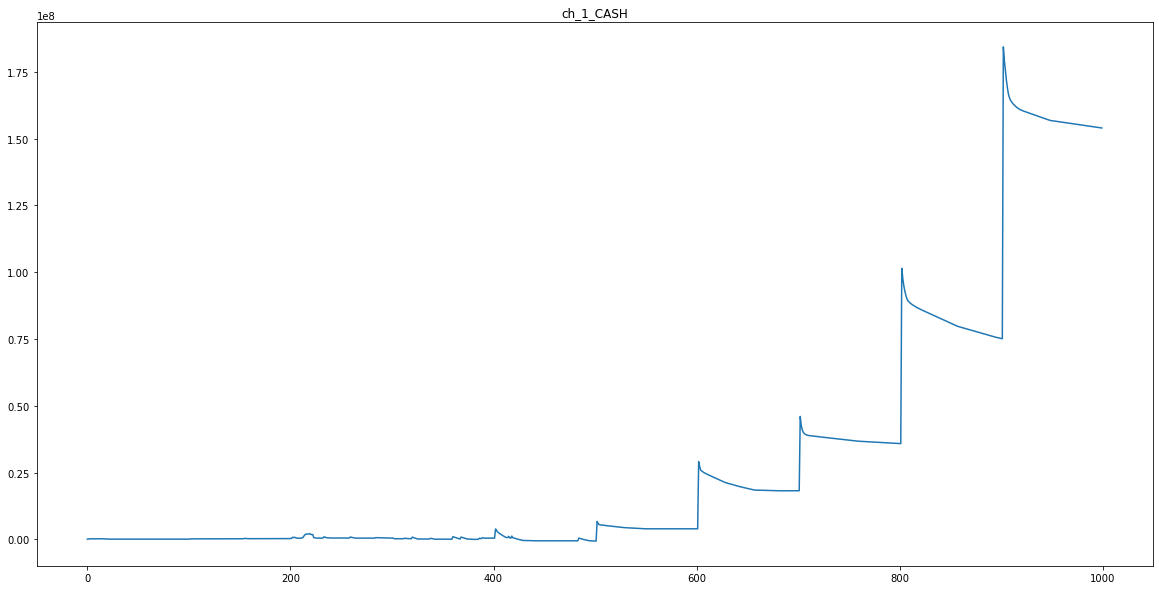

In [130]:
agent.iloc[:, 3].plot(title = agent.columns[3],  figsize = (20, 10))